# Gradient Descent

### Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.
## A simple Idea
### Starting at the top of the mountain, we take our first step downhill in the direction specified by the negative gradient. Next we recalculate the negative gradient (passing in the coordinates of our new point) and take another step in the direction it specifies. We continue this process iteratively until we get to the bottom of our graph, or to a point where we can no longer move downhill–a local minimum.



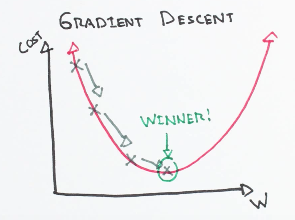

In [37]:
from IPython.display import Image
Image('gradient_descent_demystified.png')

## Learning rate
### The size of these steps is called the learning rate. With a high learning rate we can cover more ground each step, but we risk overshooting the lowest point since the slope of the hill is constantly changing. With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. A low learning rate is more precise, but calculating the gradient is time-consuming, so it will take us a very long time to get to the bottom.
## Cost function
### A Loss Functions tells us “how good” our model is at making predictions for a given set of parameters. The cost function has its own curve and its own gradients. The slope of this curve tells us how to update our parameters to make the model more accurate.
## Step-by-step
### There are two parameters in our cost function we can control: $m$ (weight) and $b$ (bias). Since we need to consider the impact each one has on the final prediction, we need to use partial derivatives. We calculate the partial derivatives of the cost function with respect to each parameter and store the results in a gradient.
### To solve for the gradient, we iterate through our data points using our new m and b values and compute the partial derivatives. This new gradient tells us the slope of our cost function at our current position (current parameter values) and the direction we should move to update our parameters. The size of our update is controlled by the learning rate.


## Import required Packages a simple function (x^2+1) is used for the following code

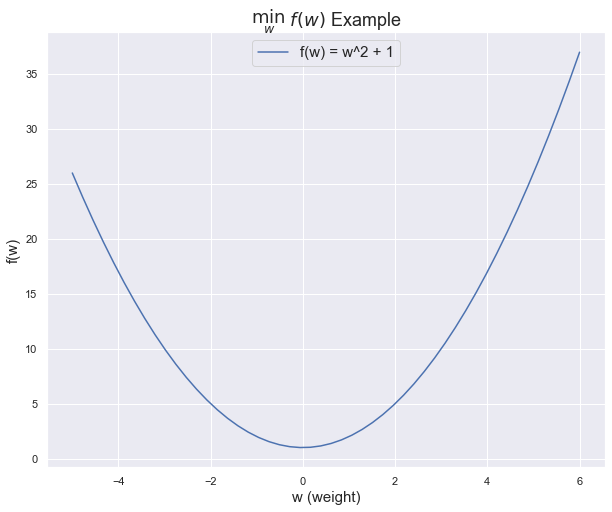

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Define test function for experimenting
def f(w):
    return w**2 + 1
# Define domain variables for plotting f
domain = np.linspace(-5, 6, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = w^2 + 1")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()

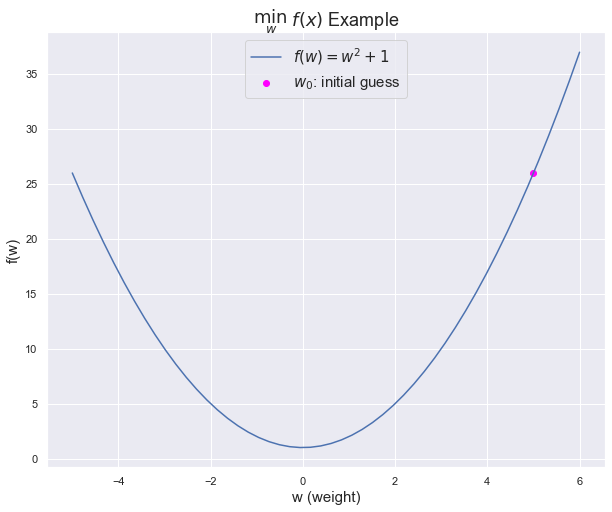

In [39]:
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2 + 1$")
plt.scatter([5], [f(5)], color = "magenta", label = "$w_0$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

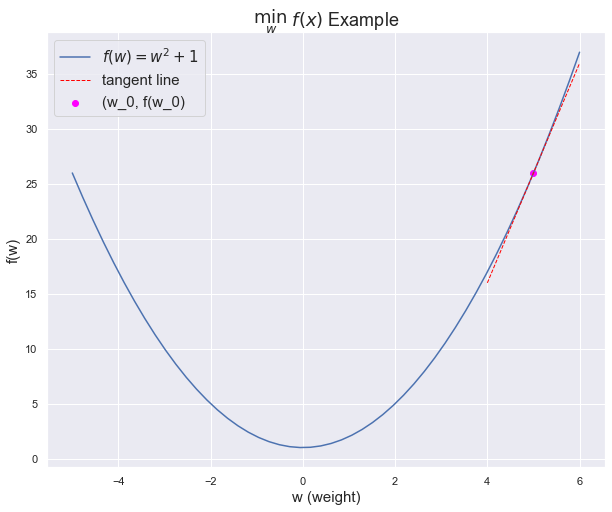

In [40]:
# Define parabola derivative
def df(w): 
    return 2*w

# Choose w_0
w_0 = 5.0

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            'C1--', 
            linewidth = 1, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i})")

# Plot the figure
plt.figure(figsize = (10, 8))
# Plot the function
plt.plot(domain, f(domain), label = "$f(w) = w^2 + 1$")
# Visualize the tangent line
tangent_line(w_0, f, df)

# Label the figure
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

w_0 = 5.0
w_1 = -3.0


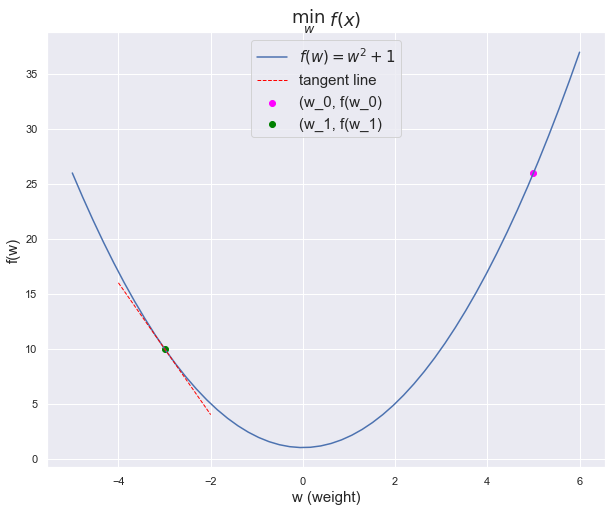

In [41]:
# Initialize choice of w
w_0 = 5.0

# Set learning rate 
alpha = .8

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - alpha*df(w_0)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()


w_0 = 5.0
w_1 = -3.0
w_2 = 1.8000000000000007


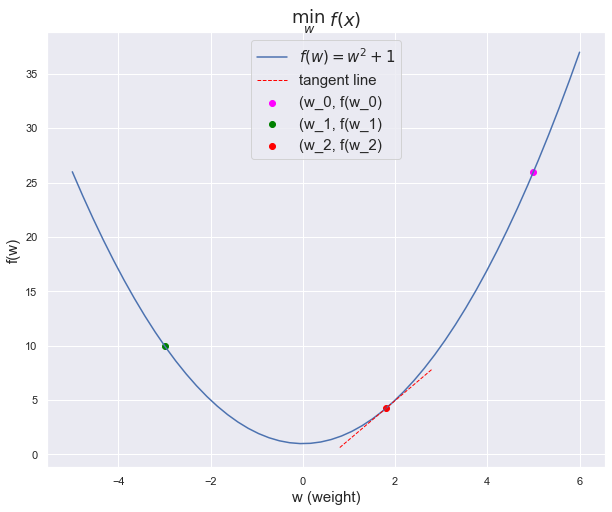

In [42]:
# Moving in the opposite direction of the derivative at w_1
w_2 = w_1 - alpha*df(w_1)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

w_0 = 5.0
w_1 = -3.0
w_2 = 1.8000000000000007
w_3 = -1.0800000000000005


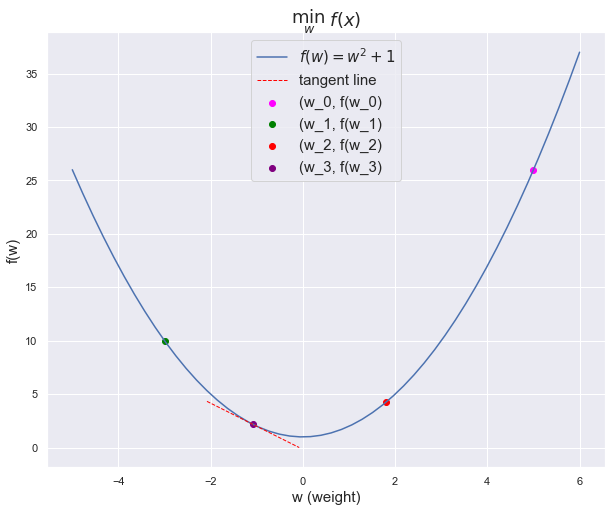

In [43]:
# Moving in the opposite direction of the derivative at w_2
w_3 = w_2 - alpha*df(w_2)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")
print(f"{w_3 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red", show = False)
tangent_line(w_3, f, df, i = 3, color = "purple")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

w_0 = 5.0 | df(w_0) = 10.0
w_1 = -3.0 | df(w_1) = -6.0
w_2 = 1.8 | df(w_2) = 3.6000000000000014
w_3 = -1.08 | df(w_3) = -2.160000000000001
w_4 = 0.65 | df(w_4) = 1.2960000000000007
w_5 = -0.39 | df(w_5) = -0.7776000000000005
w_6 = 0.23 | df(w_6) = 0.4665600000000003
w_7 = -0.14 | df(w_7) = -0.2799360000000002
w_8 = 0.08 | df(w_8) = 0.16796160000000016
w_9 = -0.05 | df(w_9) = -0.10077696000000008
w_10 = 0.03 | df(w_10) = 0.060466176000000066
w_11 = -0.02 | df(w_11) = -0.036279705600000045
w_12 = 0.01 | df(w_12) = 0.02176782336000003
w_13 = -0.01 | df(w_13) = -0.013060694016000018
w_14 = 0.0 | df(w_14) = 0.007836416409600012
w_15 = -0.0 | df(w_15) = -0.004701849845760008
w_16 = 0.0 | df(w_16) = 0.002821109907456005
w_17 = -0.0 | df(w_17) = -0.001692665944473603
w_18 = 0.0 | df(w_18) = 0.0010155995666841621
w_19 = -0.0 | df(w_19) = -0.0006093597400104974



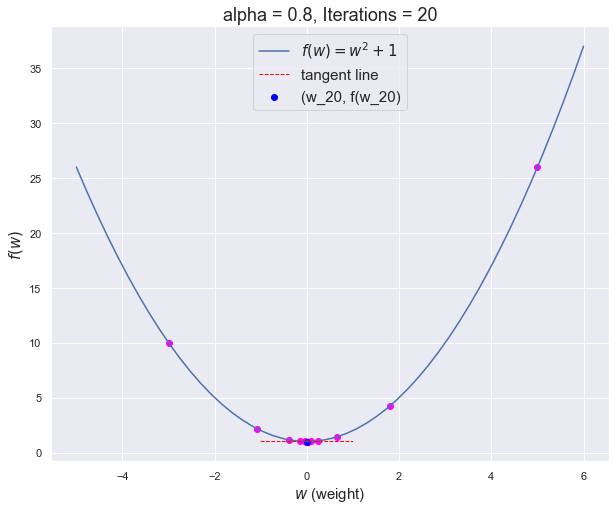

In [44]:
def derivative_descent(derivative, alpha = 0.8, w_0 = 5.0, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2 + 1$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()


# Bingo!

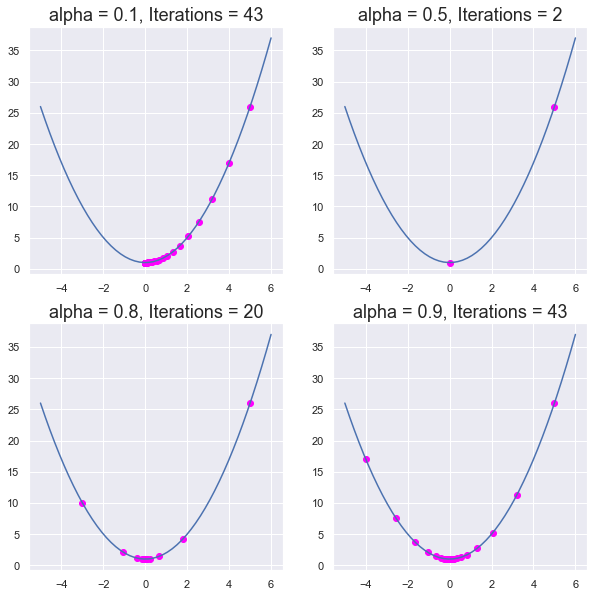

In [45]:
# Possible choices of learning rate 
alphas = [0.1, 0.5, 0.8, 0.9]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)